# Exact handicap

Exact handicap varieert door gemiddelde score en standaarddeviatie. 

- Bij standaarddeviatie van 0 is exact handicap uiteraard precies gelijk aan de gemiddelde score
- Voor elke extra eenheid aan standaarddeviatie daalt de exact handicap met bijna 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
mu = 3
std = 6
exact_handicaps = list()
for i in range(100000):

    scores = np.random.normal(loc=mu, scale=std, size=20)
    scores.sort()
    exact_handicap = scores[:8].mean()
    
    exact_handicaps.append(exact_handicap)
    
exact_handicaps = np.array(exact_handicaps)

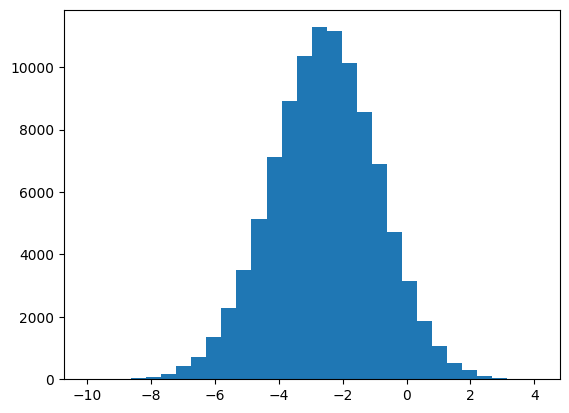

In [3]:
plt.hist(exact_handicaps, bins=30)
plt.show()

In [4]:
def get_mean_exact_hcp(mu, std):
    exact_handicaps = list()
    for _ in range(10_000):
        scores = np.random.normal(loc=mu, scale=std, size=20)
        scores.sort()
        exact_handicap = scores[:8].mean()

        exact_handicaps.append(exact_handicap)

    exact_handicaps = np.array(exact_handicaps)
    return exact_handicaps.mean()

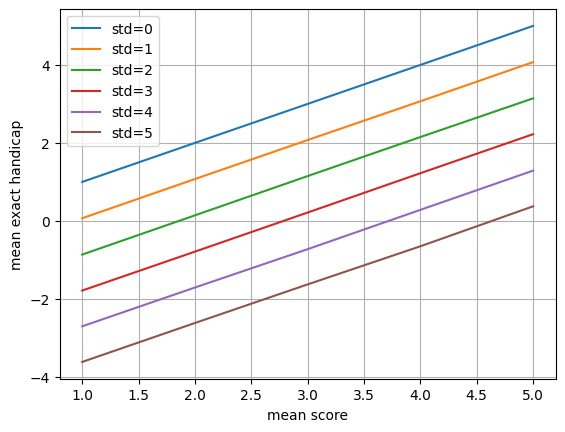

In [5]:
stds = np.arange(0, 6)
means = np.arange(1, 6)

for std in stds:
    y = list()
    for mean in means:
        y.append(get_mean_exact_hcp(mean, std))
    plt.plot(means, y, label=f"{std=}")
    
plt.ylabel('mean exact handicap')
plt.xlabel('mean score')
plt.legend()
plt.grid()
plt.show()

# Exact calculation

With ppf function we can determine where the 8th best score of the last 20 scores should lie.

Thereafter integrate the pdf function from low score to 8th best score to get the mean score of the best 8.

Rescale pdf (by dividing by percentile) to rescale area under pdf to 1.

The exact solution is similar to the simulation.

In [6]:
def get_mean_exact_hcp_analytical(mean, std):
    percentile = 8/20

    if std == 0: return mean
    
    dist = norm(loc=mean, scale=std)    
    
    x_end = dist.ppf(percentile)

    x_start = -20
    n = 1000
    dx = (x_end - x_start) / (n-1)
    som = 0
    for x in np.linspace(x_start, x_end, n):
        p = dist.pdf(x) / percentile  # divide by percentile to rescale to area under pdf to 1
        som += p * dx * x

    return som

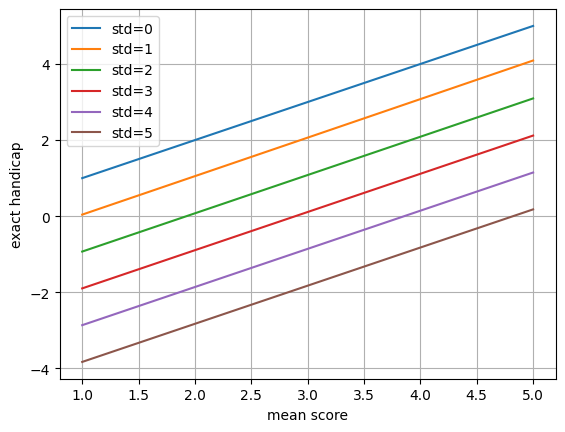

In [7]:
stds = np.arange(0, 6)
means = np.arange(1, 6)

for std in stds:
    y = list()
    for mean in means:
        y.append(get_mean_exact_hcp_analytical(mean, std))
    plt.plot(means, y, label=f"{std=}")
    
plt.ylabel('exact handicap')
plt.xlabel('mean score')
plt.legend()
plt.grid()
plt.show()